Import Library dan Memuat data

In [54]:
# Mengimpor library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memuat dataset dari upload form / tempat mengunggah file
file_path = '/content/Student_performance_data _.csv'
data = pd.read_csv(file_path)

# Prapemrosesan: Hilangkan kolom nonnumerik apa pun untuk pengelompokan K-means
data_numeric = data.select_dtypes(include=[float, int])

# Memproses jika ada nilai yang hilang
data_numeric = data_numeric.dropna()

data.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Explorasi dan Visualisasi Data

<ipython-input-49-ed830bd1a3f5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(['Female', 'Male'])


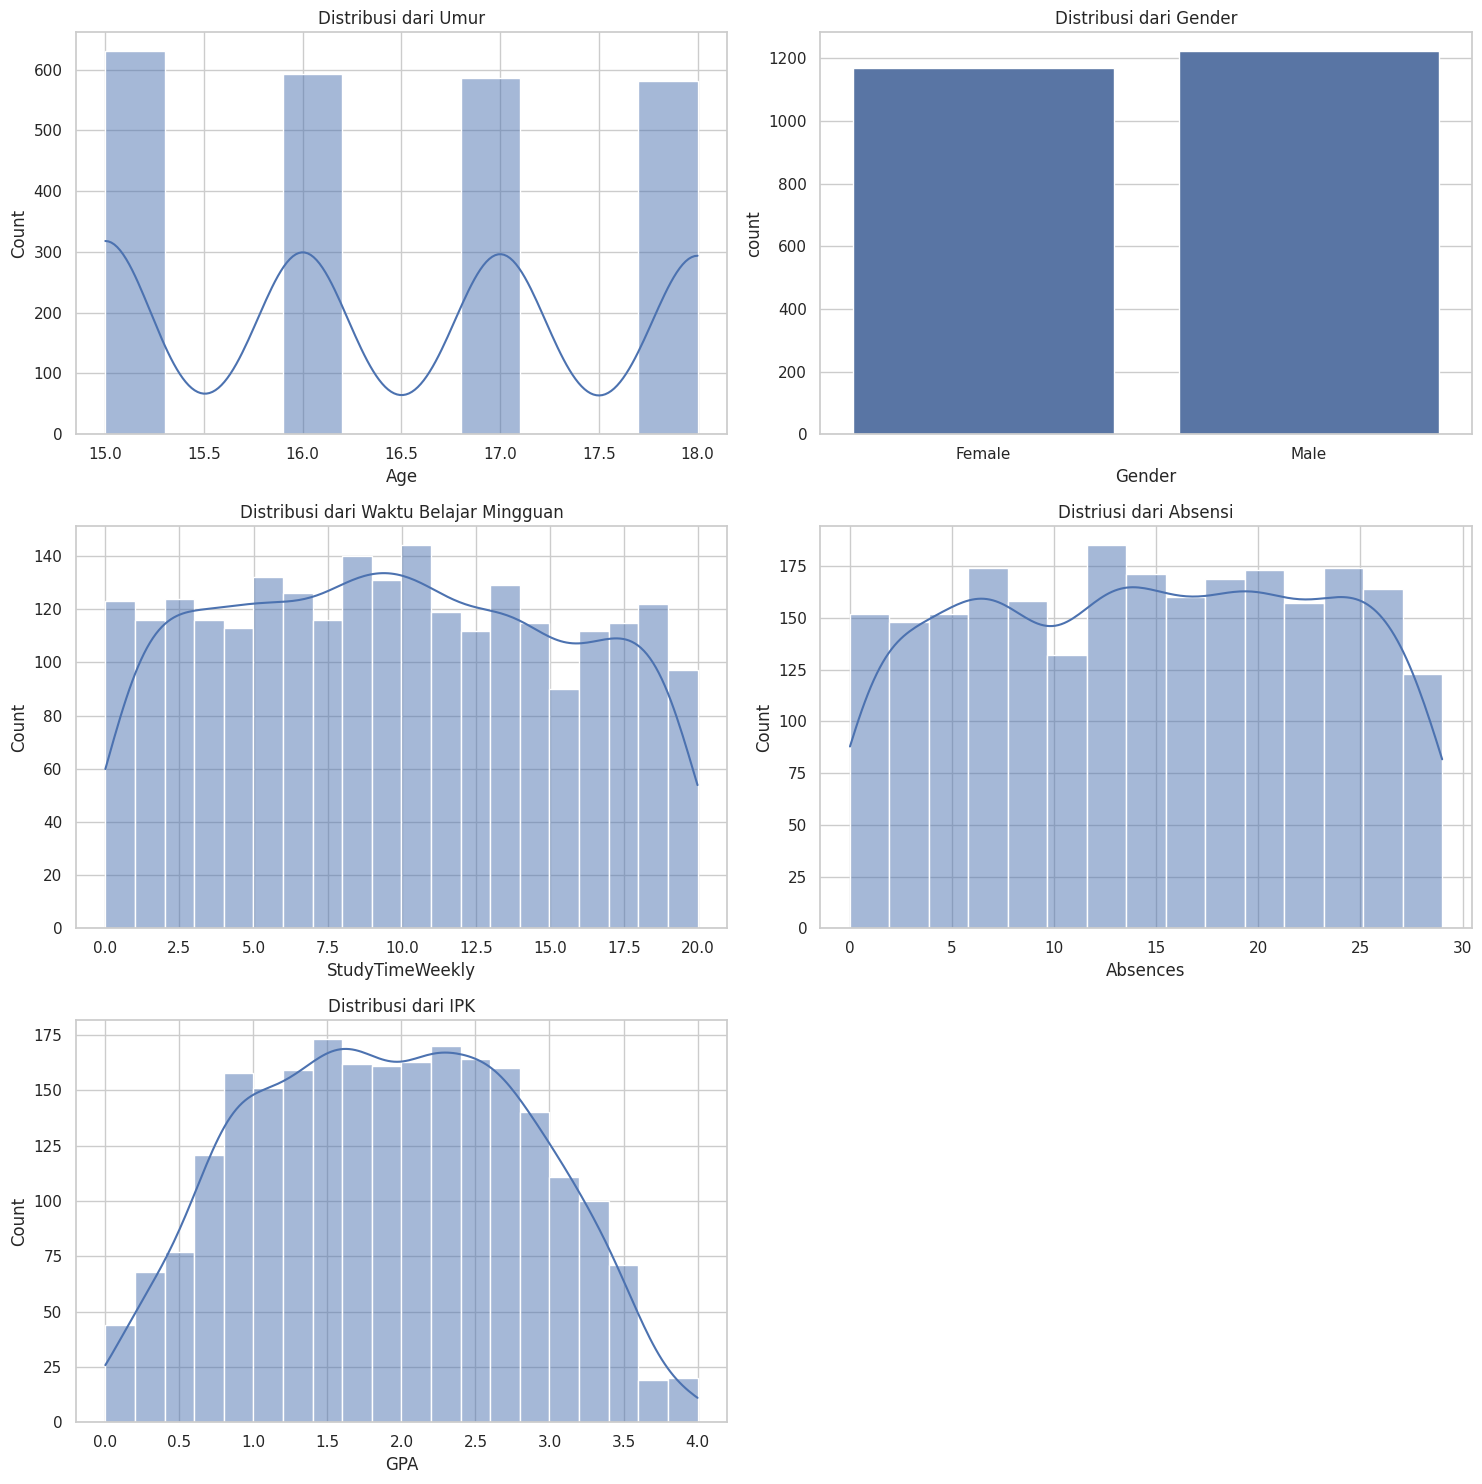

In [49]:
# Menyiapkan gaya untuk plot
sns.set(style="whitegrid")

# Membuat subplot
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot distribusi dari Umur
sns.histplot(data['Age'], bins=10, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi dari Umur')

# Plot distribusi dari Gender
sns.countplot(x='Gender', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Distribusi dari Gender')
axs[0, 1].set_xticklabels(['Female', 'Male'])

# Plot distribusi Waktu Belajar Mingguan
sns.histplot(data['StudyTimeWeekly'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribusi dari Waktu Belajar Mingguan')

# Plot distribusi Absensi
sns.histplot(data['Absences'], bins=15, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distriusi dari Absensi')

# Plot distribusi IPK
sns.histplot(data['GPA'], bins=20, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribusi dari IPK')

# Menyembunyikan subplot kosong
axs[2, 1].axis('off')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Training Data menggunakan Algoritma K-Means

In [38]:
# Pisahkan data menjadi 70:30 saat set pelatihan dan pengujian
train_data, test_data = train_test_split(data_numeric, test_size=0.3, random_state=42)

In [39]:
# Membuat Standarisasi data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

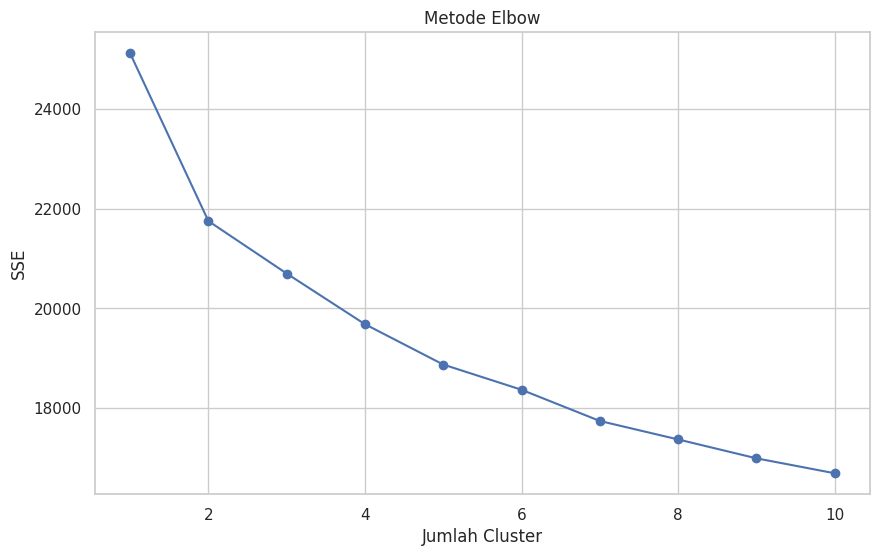

In [46]:
# Tentukan jumlah cluster optimal menggunakan metode elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data_scaled)
    sse.append(kmeans.inertia_)

# Membuat gambar Elbownya
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.show()

In [41]:
# Latih model K-means dengan jumlah cluster yang dipilih (contoh 3 cluster)
n_clusters = 3  # Pilih jumlah cluster berdasarkan kurva elbownya
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(train_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [45]:
# Memprediksi cluster untuk pengujian data
test_data['Cluster'] = kmeans.predict(test_data_scaled)

# Mencetak 5 baris pertama data pengujian dengan label Cluster
print(test_data.head(5))

# Simpan data pengujian dengan label cluster ke file CSV yang baru
test_data.to_csv('/content/Student_performance_data_test.csv', index=False)


      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1004       2005   15       1          2                  4         0.135763   
196        1197   16       1          0                  4         1.989925   
2342       3343   15       0          0                  0        10.588715   
1708       2709   18       1          1                  2        16.208658   
435        1436   18       0          0                  0         3.576821   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
1004        17         0                2                0       1      1   
196          0         0                1                1       0      0   
2342        15         0                3                0       0      0   
1708         1         0                3                1       0      0   
435         27         0                1                0       1      0   

      Volunteering       GPA  GradeClass  Cluster  
1004      

Pengujian Data

In [44]:
# Memuat dataset yang baru dari upload form / tempat mengunggah file
clustered_data_path = '/content/Student_performance_data_test.csv'
clustered_data = pd.read_csv(clustered_data_path)

# Standarisasi data yang baru
new_test_data_scaled = scaler.transform(clustered_data.drop(columns=['Cluster']))

# Memprediksi cluster menggunakan model K-means yang sudah dilatih sebelumnya
clustered_data['Predicted_Cluster'] = kmeans.predict(new_test_data_scaled)

# Mencetak 5 baris pertama dari data cluster dengan cluster yang sudah diprediksi
print(clustered_data.head(5))

# Simpan data cluster dengan cluster yang sudah diprediksi ke file CSV yang baru
clustered_data.to_csv('/content/Student_performance_data_clustered.csv', index=False)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       2005   15       1          2                  4         0.135763   
1       1197   16       1          0                  4         1.989925   
2       3343   15       0          0                  0        10.588715   
3       2709   18       1          1                  2        16.208658   
4       1436   18       0          0                  0         3.576821   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0        17         0                2                0       1      1   
1         0         0                1                1       0      0   
2        15         0                3                0       0      0   
3         1         0                3                1       0      0   
4        27         0                1                0       1      0   

   Volunteering       GPA  GradeClass  Cluster  Predicted_Cluster  
0             1  1.427724     